# Customer Credit Risk:

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing libraries
from sklearn import metrics
import warnings 
warnings.filterwarnings("ignore")

In [3]:
# Importing dataset
df = pd.read_excel(r"C:\Users\cw\Documents\Default.xlsx", index_col=0)
df.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


In [4]:
# Shape of the dataset
print("Number of Rows/Instances:", df.shape[0])
print("Number of Columns/Variables:", df.shape[1])

Number of Rows/Instances: 10000
Number of Columns/Variables: 4


In [5]:
# Summary Statistics
df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


In [6]:
# Missing values in the data

df.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

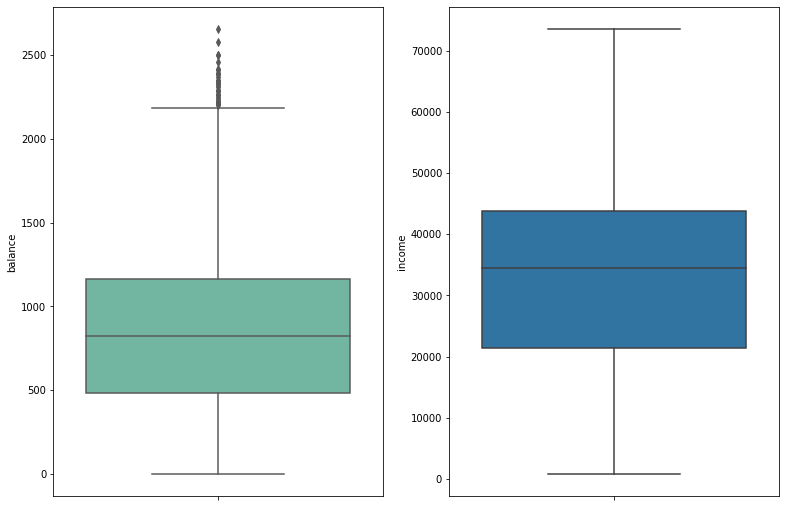

In [7]:
# Box Plot
plt.figure(figsize=(13, 9))
plt.subplot(1, 2, 1)
sns.boxplot(y=df["balance"], palette="Set2")

plt.subplot(1, 2, 2)
sns.boxplot(y=df["income"])
plt.show()

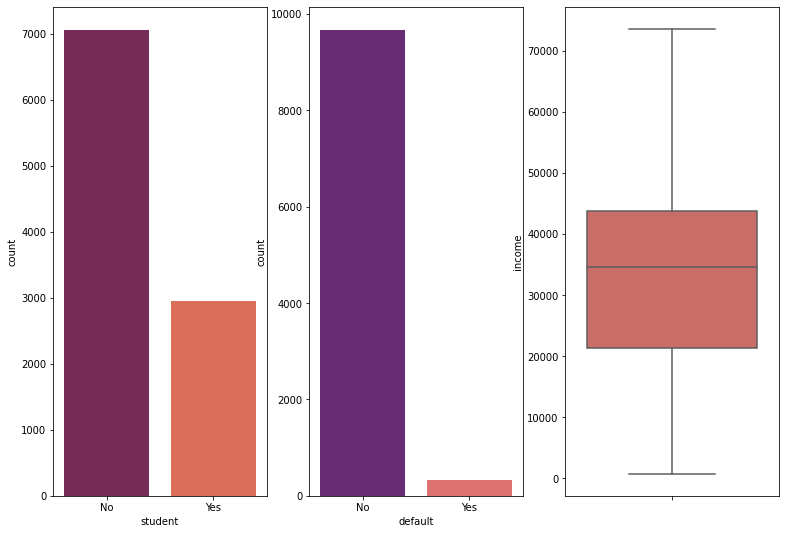

In [8]:
# Count plots

plt.figure(figsize=(13, 9))
plt.subplot(1, 3, 1)
sns.countplot(df["student"], palette="rocket")

plt.subplot(1, 3, 2)
sns.countplot(df["default"], palette="magma")

plt.subplot(1, 3, 3)
sns.boxplot(y= df["income"], palette="hls")
plt.show()

In [9]:
# Students value count
df.student.value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [10]:
# Value counts of default

df.default.value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [11]:
# Value count of default as percentage

df.default.value_counts(normalize=True) * 100

No     96.67
Yes     3.33
Name: default, dtype: float64

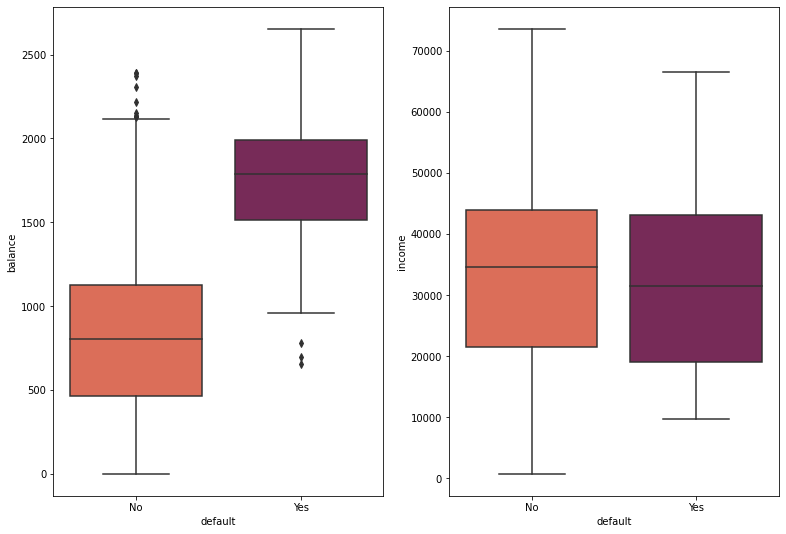

In [12]:
# Bi-variate or multi-variate analysis
# Box plots

plt.figure(figsize=(13, 9))
plt.subplot(1, 2, 1)
sns.boxplot(x=df["default"], y=df["balance"], palette="rocket_r")

plt.subplot(1, 2, 2)
sns.boxplot(x=df["default"], y=df["income"], palette="rocket_r")
plt.show()

In [13]:
# Making a cross table for student and default columns

c_tab = pd.crosstab(df["student"], df["default"], normalize="index").round(2) * 100
c_tab

default,No,Yes
student,,
No,97.0,3.0
Yes,96.0,4.0


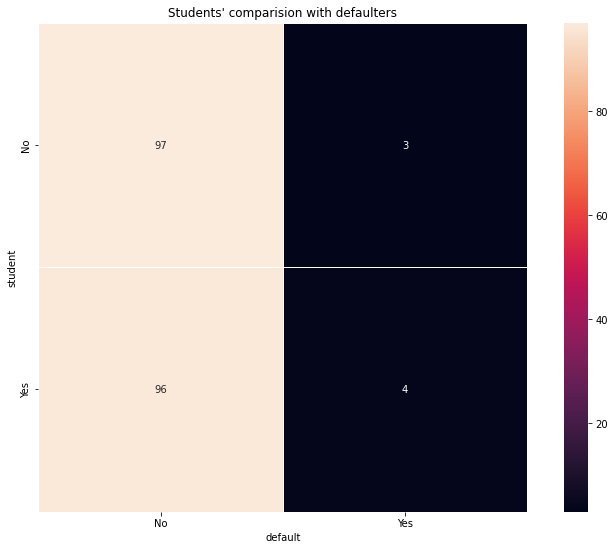

In [14]:
# Heat map

plt.figure(figsize=(13, 9))
sns.heatmap(c_tab, annot=True, square=True, linewidths=0.5, cmap="rocket")
plt.title("Students' comparision with defaulters")
plt.show()

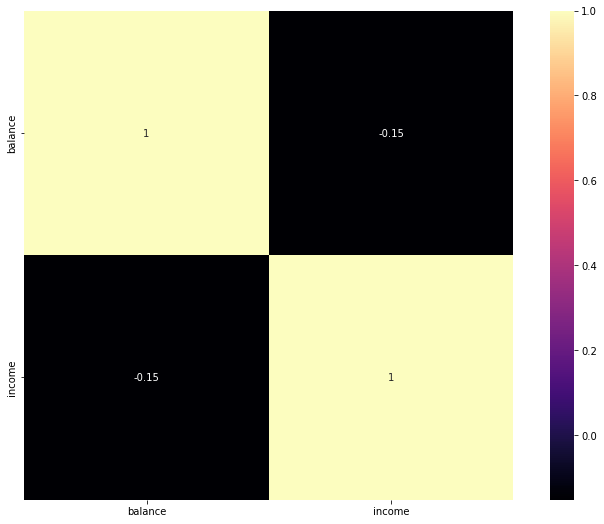

In [15]:
# Heatmap

plt.figure(figsize=(13, 9))
sns.heatmap(df[["balance", "income"]].corr(), annot=True, square=True, cmap="magma")
plt.show()

In [16]:
# Inter-quartile range

Q1, Q3 = df["balance"].quantile([.25, .75])
IQR = Q3 - Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

In [17]:
print("The values of lower quartile:", Q1, "and upper quartile:", Q3)
print("Inter-quartile range is:",IQR)
print("The Lower limit is:", LL, "and the upper limit is:", UL)

The values of lower quartile: 481.73110505451825 and upper quartile: 1166.308386475837
Inter-quartile range is: 684.5772814213188
The Lower limit is: -545.1348170774601 and the upper limit is: 2193.1743086078154


In [18]:
# Extracting outliers

outliers = df[df["balance"] > UL]
outliers

,default,student,balance,income
174,Yes,Yes,2205.799521,14271.492253
1137,Yes,No,2499.016750,51504.293960
1161,Yes,Yes,2502.684931,14947.519752
1360,Yes,No,2220.966201,40725.096207
1503,Yes,Yes,2332.878254,11770.234124
1610,Yes,Yes,2269.946966,18021.105948
2097,Yes,Yes,2261.848162,20030.165119
2141,No,Yes,2308.893236,19110.266412
2930,Yes,Yes,2387.314867,28296.914718
3163,Yes,Yes,2415.316994,17429.503375


In [19]:
# Value count of outliers default column

outliers.default.count()

31

In [20]:
# Percentage of outliers in the outliers default column

outliers.default.value_counts(normalize = True) * 100 

Yes    83.870968
No     16.129032
Name: default, dtype: float64

- Hence, the percentage of defaulters in the outliers dataset is about 84%, so we cannot remove them but we can set them equla to the upper limit otherwise the data can be misleading.  

In [21]:
# Setting defaulters (outliers) equal to the upper limit

df["balance"] = np.where(df["balance"] > UL, UL, df["balance"])

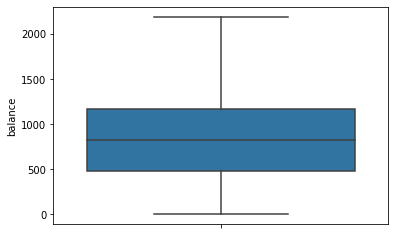

In [22]:
# boxplot for balance column

sns.boxplot(y=df["balance"])
plt.show()

In [23]:
df1 = pd.get_dummies(df, drop_first=True)
df1

,balance,income,default_Yes,student_Yes
1,729.526495,44361.625074,0,0
2,817.180407,12106.134700,0,1
3,1073.549164,31767.138947,0,0
4,529.250605,35704.493935,0,0
5,785.655883,38463.495879,0,0
...,...,...,...,...
9996,711.555020,52992.378914,0,0
9997,757.962918,19660.721768,0,0
9998,845.411989,58636.156984,0,0
9999,1569.009053,36669.112365,0,0


In [24]:
# Renaming columns

df1.columns = ["balance", "income", "default", "student"]

In [25]:
# Importing selection model
from sklearn.model_selection import train_test_split

In [26]:
# Splitting the columns

x = df1.drop("default", axis=1)
y = df1["default"]

In [27]:
# Splitting the data into train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=21, stratify= y)

In [28]:
# Printing the shape of the train and test sets
print("Number of instances in training set:", x_train.shape[0], "Number of variables in train set:", x_train.shape[1])
print("")
print("Number of instances in test set:", x_test.shape[0], "Number of variables in test set:", x_test.shape[1])

Number of instances in training set: 7000 Number of variables in train set: 3

Number of instances in test set: 3000 Number of variables in test set: 3


### Why Stratify = y?
- **Note:** because this data is highly imbalanced and could possibly result into different proportions in the y variable between train and test set.

In [29]:
# Percentage of defaulters or otherwise in training and test datasets

print(y_train.value_counts(normalize=True).round(2) * 100)
print("")
print(y_test.value_counts(normalize=True).round(2) * 100)

0    97.0
1     3.0
Name: default, dtype: float64

0    97.0
1     3.0
Name: default, dtype: float64


#### Treating Target Imbalance Using SMOTE:

In [30]:
# %pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [33]:
# %pip install imblearn

In [38]:
# Treating target imbalance
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=33, sampling_strategy=0.75)
x_res , y_res = sm.fit_resample(x_train, y_train) 

In [39]:
# Importing machine learning libraries

from sklearn.linear_model import LogisticRegression

In [40]:
# Fitting the model
model = LogisticRegression().fit(x_res, y_res)

In [41]:
# Making prediction

y_pred = model.predict(x_test)

In [42]:
# Importing confusion matrix
from sklearn.metrics import confusion_matrix

In [43]:
# Confusion matrix (for accuracy score)
confusion_matrix(y_test, y_pred)

array([[2589,  311],
       [  25,   75]], dtype=int64)

In [47]:
# For accuracy score

print("Accuracy of the predicted values:", (2589+75) / (2589+25+75+311) * 100,"%")

Accuracy of the predicted values: 88.8 %
